# ***AI(II)_Project_1_A Spyros Briakos 1115201700101***

## Import useful libraries

In [402]:
import pandas as pd
import numpy as np
import random
import string
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import recall_score,f1_score,precision_score
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Get and prepare our dataset!

### Firstly read and display .csv file!

In [403]:
housing_data = pd.read_csv(r'/content/drive/My Drive/HousingData.csv',index_col=0)
display(housing_data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
0,3.9816,27.0,4.928668,1.122476,3009.0,4.049798,33.73,-117.93,1.795
1,3.4531,23.0,4.021339,1.099338,2511.0,1.847682,34.14,-118.13,2.109
2,6.3942,4.0,5.681272,1.095774,5613.0,2.176425,37.78,-121.95,3.567
3,2.2243,32.0,5.685221,1.009597,1542.0,2.959693,38.69,-121.45,0.892
4,3.0217,9.0,5.006324,1.071146,3265.0,2.581028,37.69,-121.04,1.609
...,...,...,...,...,...,...,...,...,...
16507,5.7214,16.0,6.231429,0.917143,1133.0,3.237143,34.12,-117.68,2.594
16508,2.7254,41.0,3.834829,0.985637,986.0,1.770197,34.02,-118.47,4.444
16509,2.5288,16.0,5.315638,1.060258,2463.0,3.533716,36.98,-120.05,0.618
16510,2.6165,34.0,4.593168,1.031056,1166.0,3.621118,33.89,-118.24,1.009


### Let's do train_test_split,Standardization and plot train data!

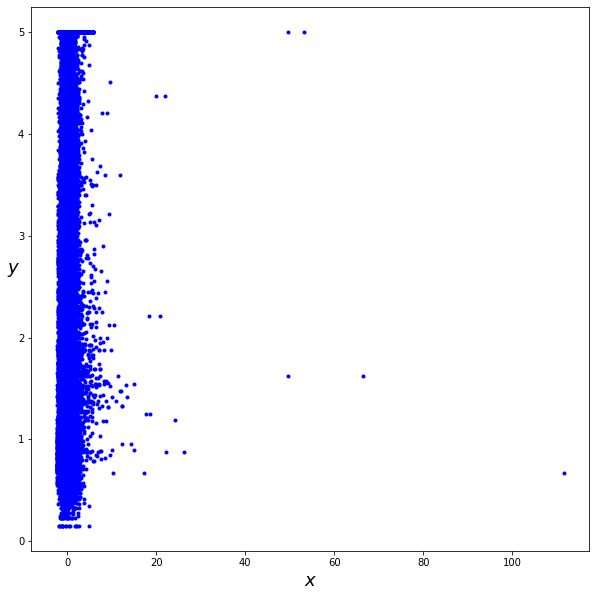

In [404]:
Y = pd.DataFrame(housing_data,columns=['Median House Value'])
housing_data.drop(housing_data.columns[8],axis=1,inplace=True)
X = pd.DataFrame(housing_data)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.figure(figsize=(10,10))
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_=plt.plot(X_train,Y_train,'b.')

### Shapes of X_train,Y_train,X_test,Y_test

In [405]:
# Add in first column ones for bias.
X_train = np.c_[np.ones((len(X_train),1)),X_train]
X_test = np.c_[np.ones((len(X_test),1)),X_test]

print("X_train's shape:", X_train.shape)
print("Y_train's shape:", Y_train.shape)
print("X_test's shape:", X_test.shape)
print("Y_test's shape:", Y_test.shape)

X_train's shape: (13209, 9)
Y_train's shape: (13209, 1)
X_test's shape: (3303, 9)
Y_test's shape: (3303, 1)


## Implementation of Linear Regression!

### Linear Regression's class

In [406]:
class Linear_Regression():

  def predict(self,X) :     
    """
    Variables:
    X: train's matrix with shape (m,n)

    Returns:
    Hypothetical function  h(x)  
    """
    return np.dot(X,self.W)

  def cost(self,X,Y):
    """  
    Variables: 
    n: features (of each vector x(i))
    m: training examples 
    X: train's matrix with shape (m,n)
    Y: label's matrix with shape (m,1)
    W: parameter's vector with shape (n,1)
    
    Returns: 
    Linear Regression's loss 
    """
    m = X.shape[0]

    predictions = self.predict(X) 

    cost = (1/m)*np.sum(np.square(predictions-Y))
    
    return cost
  
  def batch_fit(self,X,Y,learning_rate,iterations):
    """
    Variables:
    n: features (of each vector x(i))
    m: training examples 
    X: train's matrix with shape (m,n)
    Y: label's matrix with shape (m,1)
    W: parameter's vector with shape (n,1)
    costs: cost's vector (iterations,1)

    Returns:
    Costs (contains cost of Linear Regression's cost function of each iteration)
    
    """

    # Initialization of m,n,X,Y.  
    m,n = X.shape
    
    # Random initialization of W.  
    self.W = np.random.randn(n,1)*0.01
    
    # Initialization of costs with zeros.  
    costs = np.zeros((iterations,1))

    for i in range(iterations):
      gradient = (2/m)*(np.dot(X.T,(np.dot(X,self.W)-Y)))
      self.W = self.W - learning_rate*gradient
      costs[i] = self.cost(X,Y)

    return costs

  def stohastic_fit(self,X,Y,learning_rate,iterations,batch_size=1):
    """
    Variables:
    n: features (of each vector x(i))
    m: training examples 
    X: train's matrix with shape (m,n)
    Y: label's matrix with shape (m,1)
    W: parameter's vector with shape (n,1)
    costs: cost's vector (iterations,1)

    Returns:
    Costs (contains cost of Linear Regression's cost function of each iteration)

    """  

    # Initialization of m,n,X,Y.  
    m,n = X.shape

    # Random initialization of W.  
    self.W = np.random.randn(n,1)*0.01

    # Initialization of costs with zeros.  
    costs = np.zeros((iterations,1))
    
    for i in range(iterations):
      cur_cost = 0.0
      # Pick batch_size=one random xi from our dataset (X).
      for j in range(batch_size):
        random_index = np.random.randint(0,m)
        xi = X[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        gradient = (2/xi.shape[0])*(np.dot(xi.T,(np.dot(xi,self.W)-yi))) 
        self.W = self.W - learning_rate*gradient
        cur_cost += self.cost(xi,yi)
      costs[i] = cur_cost
    
    return costs

  def mini_batch_fit(self,X,Y,learning_rate,iterations,batch_size=20):
    """
    Variables:
    n: features (of each vector x(i))
    m: training examples 
    X: train's matrix with shape (m,n)
    Y: label's matrix with shape (m,1)
    W: parameter's vector with shape (n,1)

    Returns:
    Costs (contains cost of Linear Regression's cost function of each iteration)

    """  
  
    # Initialization of m,n,X,Y.  
    m,n = X.shape
    
    # Random initialization of W.  
    self.W = np.random.randn(n,1)*0.01

    # Initialization of costs with zeros.  
    costs = np.zeros((iterations,1))
    
    for i in range(iterations):
      cur_cost = 0.0
      # Pick batch_size random xi from our dataset (X).
      for j in range(batch_size):
        random_index = np.random.randint(0,m)
        xi = X[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        gradient = (2/xi.shape[0])*(np.dot(xi.T,(self.predict(xi) -yi))) 
        self.W = self.W - learning_rate*gradient
        cur_cost += self.cost(xi,yi)
      costs[i] = cur_cost

    return costs

## Observations

### Train models with different gradient descents.

In [407]:
# Iterations
iters = 1000

# Batch Gradient Descent
batch_learning_rate = 0.01
batch_linear_reg = Linear_Regression()
batch_cost = batch_linear_reg.batch_fit(X_train,Y_train,batch_learning_rate,iters)

# Stohastic Gradient Descent
stoch_learning_rate = 0.001
stoh_linear_reg = Linear_Regression()
stoh_cost = stoh_linear_reg.stohastic_fit(X_train,Y_train,stoch_learning_rate,iters)

# Mini-Batch Gradient Descent
mini_batch_learning_rate = 0.0001
mini_batch_linear_reg = Linear_Regression()
mini_batch_cost = mini_batch_linear_reg.mini_batch_fit(X_train,Y_train,mini_batch_learning_rate,iters)

### Display one plot for each gradient descent
#### Linear Regression's cost in y axis and num_of_iterations in x axis.

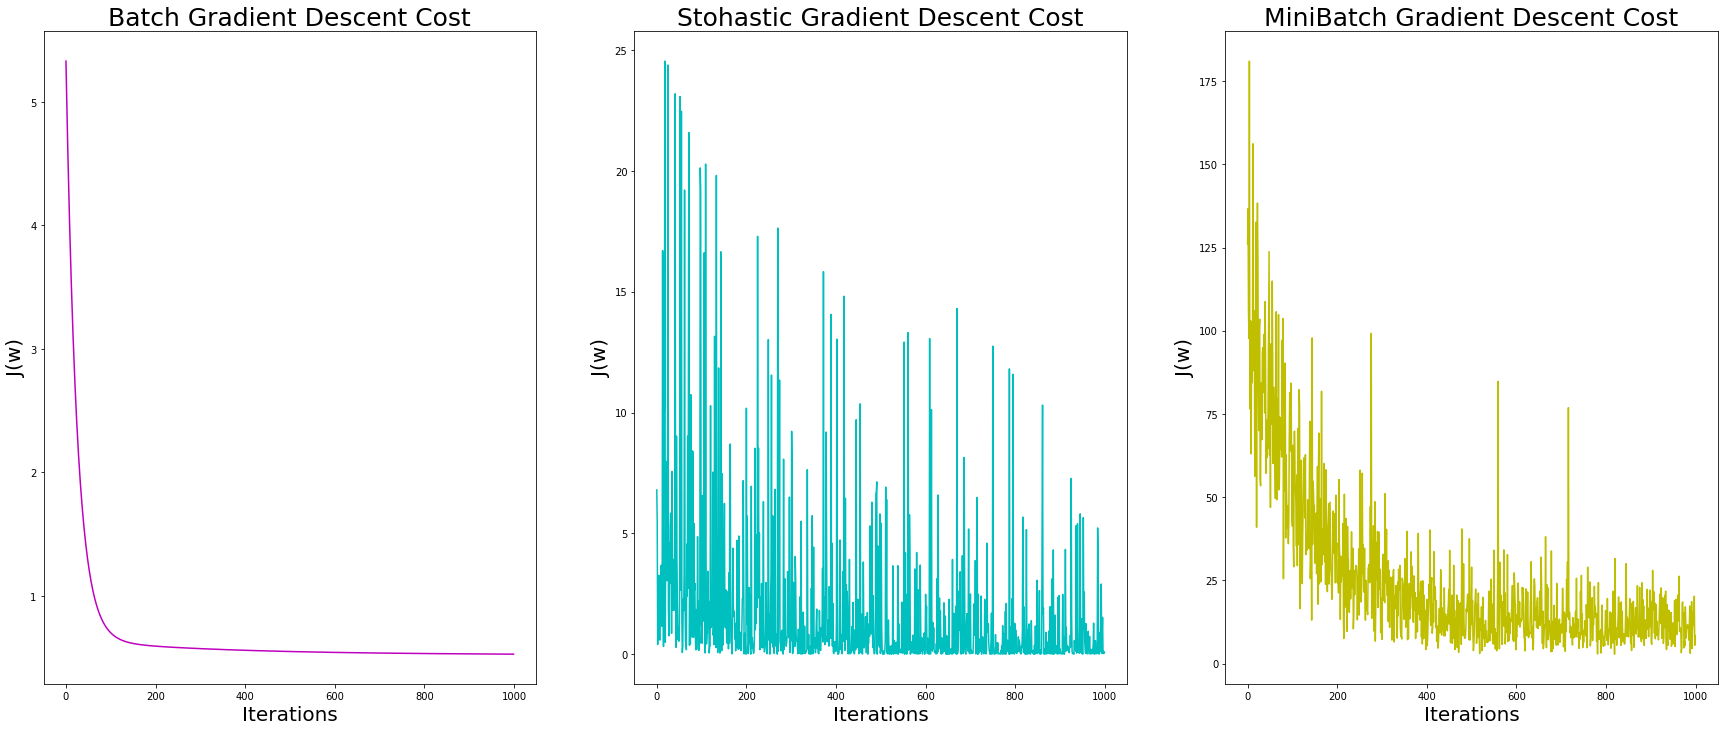

In [408]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,12))

ax1.set_title("Batch Gradient Descent Cost",size=25)
ax1.set_ylabel('J(w)', fontsize = 20.0) 
ax1.set_xlabel('Iterations', fontsize = 20) 

ax2.set_title("Stohastic Gradient Descent Cost",size=25)
ax2.set_ylabel('J(w)', fontsize = 20.0) 
ax2.set_xlabel('Iterations', fontsize = 20) 

ax3.set_title("MiniBatch Gradient Descent Cost",size=25)
ax3.set_ylabel('J(w)', fontsize = 20.0) 
ax3.set_xlabel('Iterations', fontsize = 20) 

_=ax1.plot(range(iters),batch_cost,'-m')
_=ax2.plot(range(iters),stoh_cost,'-c')
_=ax3.plot(range(iters),mini_batch_cost,'-y')



---


I runned multiple times with various different learning rates and I believe that I picked the best learning rates for each gradient descent. As we can observe in batch gradient descent we have a decreasing curve which is going nearby cost<0.5. On the other hand stohastic gradient and mini batch gradient descent converge to small cost values but sometimes, duo to randomness, we have some big cost's values!


---


I discover and study book Hands On ML with Scikit Learn and whichever info I noticed on piazza posts. So my implementations are mainly based one these sources.


---


Implementations of gradient descents are very similar with the only difference that:

1) For Batch Gradient Descent batch size is all training examples of dataset.

2) For Stohastic Gradient Descent batch size is one random training example of dataset.

3) For Mini Batch Gradient Descent batch size is small_number (i.e 20) random trainings examples of dataset.


---

